In [1]:
import numpy as np
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [2]:
a=np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
b=np.array([[1,0,-1],])
print(a)
print(b)
print(a@b.T)
print(np.sum(a,axis=0))
print(np.repeat(b,3,axis=0))

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]
[[ 1  0 -1]]
[[-2]
 [-2]
 [-2]
 [-2]]
[10 14 18]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


In [2]:
# Adaline with gradient descent
@dataclass
class Adaline:
    eta:float = 0.1
    n_iter:int = 50
    seed:int = 1

    def fit(self, X, y):
        # initialize wj and b
        # X must be n samples, m features; y must be n samples, 1 column
        self.w=np.random.RandomState(seed=self.seed).normal(0,0.05,size=X.shape[1]).T  # shape: m x 1
        self.b=np.float_(0)
        # get total sample size n
        n=X.shape[0]

        # initialize errors 
        self.errors=[]

        # run iterations
        for _ in range(self.n_iter):
            # initialize error collector 
            error=0
            # in each iteration calc identity func/net input then convert to y-y_hat
            # then calc dL/db then dL/dwj
            dL_db = - np.sum(y-self.net_input(X),axis=0)/n  # n x 1 then sum by column to a scalar
            dL_dw = - ((y.T-self.net_input(X).T) @ X)/n  # (1 x n - 1 x n) * n x m = 1 x m

            # calc delta_w and delta_b
            delta_b=-self.eta*dL_db  # 1 x 1
            delta_w=-self.eta*dL_dw.T  # m x 1

            # update both wj and b
            self.b+=delta_b
            self.w+=delta_w # m x 1 + m x 1 = m x 1

            # record error of this iteration
            error = np.sum(y-self.net_input(X),axis=0)/n
            # self.errors.append(np.abs(error))
            self.errors.append(error**2)
        
        # next iteration
        return self
    
    def net_input(self,X):
        z = X @ self.w + self.b # n x m * m x 1 = n x 1
        return z


/tmp/ipykernel_1958/2360506953.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1]=np.where(df.iloc[:,-1]=='Iris-versicolor',1,0)


      0    1    2    3  4
48  5.3  3.7  1.5  0.2  0
49  5.0  3.3  1.4  0.2  0
50  7.0  3.2  4.7  1.4  1
51  6.4  3.2  4.5  1.5  1
<class 'numpy.ndarray'> (100, 2)


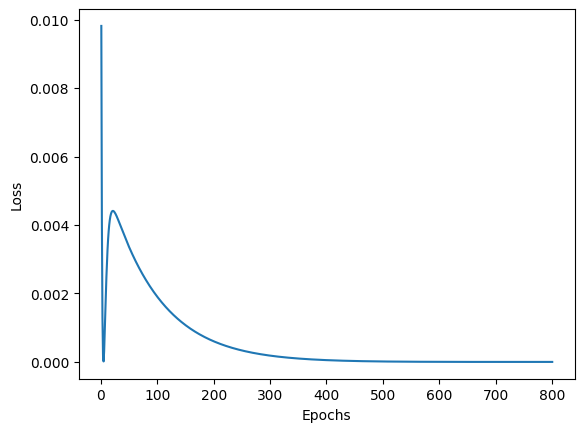

In [3]:
# training perceptron on Iris dataset
url=r'./iris.data'
df=pd.read_csv(url,header=None,encoding='utf-8')
# keep only the first two Iris flower: setosa and versicolor
df=df.iloc[:100,:]

# convert string class labels to 1-versicolor and 0-setosa
df.iloc[:,-1]=np.where(df.iloc[:,-1]=='Iris-versicolor',1,0)
print(df.iloc[48:52,:])
# extract X and y
X=df.iloc[:,[0,2]].values
y=df.iloc[:,-1].values
print(type(X),X.shape)

# training
adaline=Adaline(eta=0.005,n_iter=800)
adaline.fit(X,y)
plt.plot(range(1,len(adaline.errors)+1), adaline.errors)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

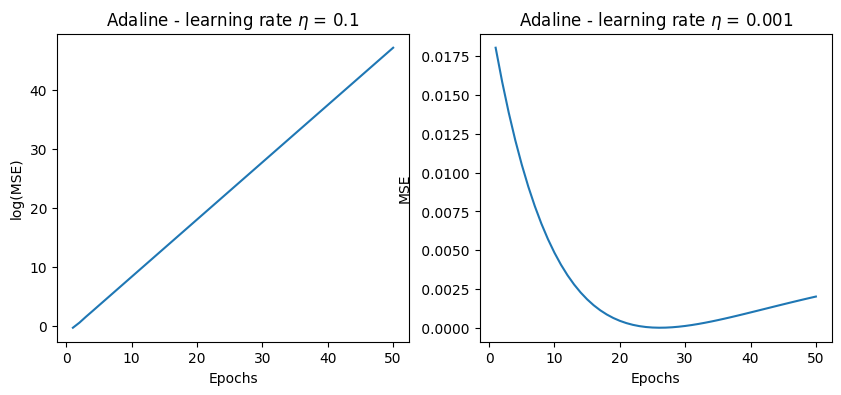

In [4]:
# plot loss function with different hyperparameter
fig, ax=plt.subplots(1,2,figsize=(10,4))

# run two experiments
ada1=Adaline(eta=0.1,n_iter=50).fit(X,y)
ada2=Adaline(eta=0.001,n_iter=50).fit(X,y)

ax[0].plot(range(1, len(ada1.errors)+1),np.log10(ada1.errors))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(MSE)')
ax[0].set_title('Adaline - learning rate $\eta$ = 0.1')

ax[1].plot(range(1, len(ada2.errors)+1),ada2.errors)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MSE')
ax[1].set_title('Adaline - learning rate $\eta$ = 0.001')
ax[1].yaxis.set_major_formatter(FormatStrFormatter('% .4f'))
plt.show()

In [5]:
# standardize X so that large learning rate can be implemented to achieve convergence quickly
X_standardized=X.copy()
means=np.mean(X_standardized,axis=0)
std=np.std(X_standardized,axis=0)
X_standardized=(X_standardized-means)/std

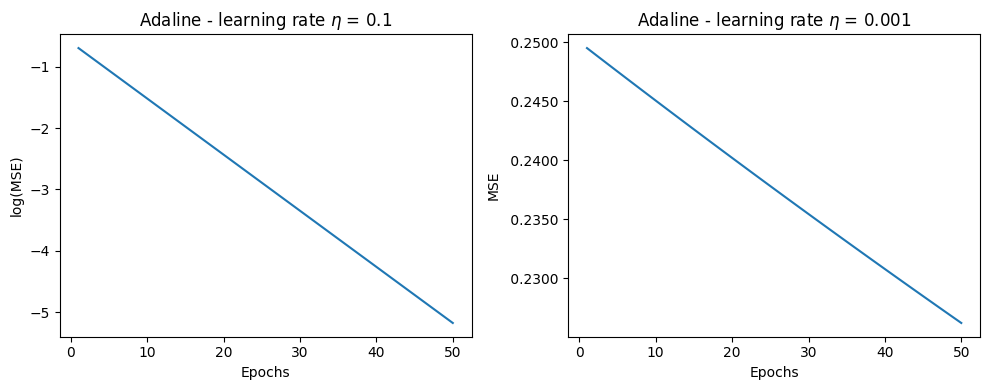

In [6]:
# plot loss function with different hyperparameter
fig, ax=plt.subplots(1,2,figsize=(10,4))

# run two experiments
ada1=Adaline(eta=0.1,n_iter=50).fit(X_standardized,y)
ada2=Adaline(eta=0.001,n_iter=50).fit(X_standardized,y)

ax[0].plot(range(1, len(ada1.errors)+1),np.log10(ada1.errors))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(MSE)')
ax[0].set_title('Adaline - learning rate $\eta$ = 0.1')

ax[1].plot(range(1, len(ada2.errors)+1),ada2.errors)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MSE')
ax[1].set_title('Adaline - learning rate $\eta$ = 0.001')
ax[1].yaxis.set_major_formatter(FormatStrFormatter('% .4f'))
plt.tight_layout()
plt.show()

In [7]:
np.random.RandomState(seed=2).permutation(15)

array([11,  4,  5,  0,  9,  3,  1, 10,  7, 12,  2,  6, 14, 13,  8])